## On the adult dataset build a model to classify the data as stable income and unstable income using Logistic Regression

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). 

**The prediction task is to determine whether a person makes over $50K a year.**

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

In [3]:
data=pd.read_csv('C:\\Users\\krishna meghana\\Downloads\\adult.csv',header=None)

In [4]:
data.columns=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']

In [5]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
data.shape

(32561, 15)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


__Numerical Attributes__: Age, FnlWgt, Education-num, Capital-Gain, Capital-Loss, Hours-Per-Week.


__Categorical Attributes__: WorkClass, Education, Marital-Status, Occupation, Relationship, Race, Sex, Native-Country, Income.

- Age: Describes the age of individuals. Continuous.
- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: Continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: Number of years spent in education. Continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: Continuous.
- capital-loss: Continuous.
- hours-per-week: Continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


There appears to be a huge difference in the minimum and maximum values. The data needs to be scaled for modeling.

In [9]:
#Checking for missing values

data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There are no missing values. But just to be sure, looking at the value counts of a categorical variable

In [10]:
data.occupation.value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
data.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

Here, we have encountered an unknown character '?'

The missing values must have been imputed with this character. Replacing this character with nan values to get the exact number of missing values.

In [12]:
data[data == ' ?'] = np.nan

In [13]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

The variables - __workclass__, __occupation__ and __native_country__ contain missing values. All of these variables are of categorical data type. So, we can impute the missing values with the most frequent value of that column - the mode.

In [14]:
data["workclass"]=data["workclass"].fillna(data["workclass"].mode()[0])
data["occupation"]=data["occupation"].fillna(data["occupation"].mode()[0])
data["native_country"]=data["native_country"].fillna(data["native_country"].mode()[0])

In [15]:
#Now we again check for missing values
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

There are no missing values now.

In [16]:
data.duplicated().sum()

24

In [17]:
print("Initial shape of the dataset : ", data.shape)

# Dropping the duplicate Rows
data = data.drop_duplicates(keep = 'first')
print ("Shape of the dataset after dropping the duplicate rows : ", data.shape)

Initial shape of the dataset :  (32561, 15)
Shape of the dataset after dropping the duplicate rows :  (32537, 15)


In [18]:
data1=data

In [19]:
# Reformat The Column We Are Predicting
data1['income']=data['income'].map({' <=50K': 0, ' >50K': 1})
data1.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [20]:
data1.income.value_counts()

0    24698
1     7839
Name: income, dtype: int64

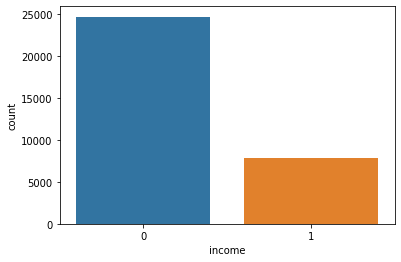

In [21]:
sns.countplot(data1['income'],label="Count")
plt.show()

- The number of people earning more than 50K dollars an year is almost one third of the people earning less than it.

The classes are imbalanced.

### Exploratory Data Analysis

In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education_num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital_gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital_loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0
income,32537.0,0.240926,0.427652,0.0,0.0,0.0,0.0,1.0


- The minimum and maximum age of people in the dataset is 17 and 90 years respectively, while the average age is 37.
- The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
- While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
- The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

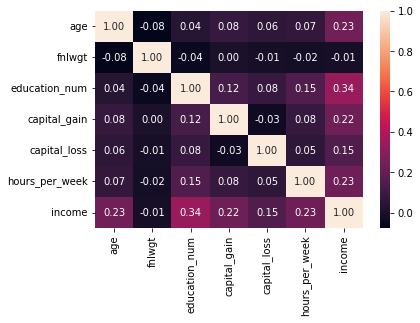

In [23]:
# Correlation matrix between numerical values
g = sns.heatmap(data1.corr(),annot=True, fmt = ".2f")
plt.show()

'Capital_gain', 'Education_num', 'hours_per_week', 'age' are most correlated to the Income of the observations.

Capital gain and Capital loss don’t anti-correlate a lot, which says people can invest only if they have money.

There is no strong positive or negative correlation between these variables. Thus we are unlikely to run into any multi-collinearity issues in the model.

In [24]:
# set the background style of the plot
sns.set_style('whitegrid')

<AxesSubplot:xlabel='hours_per_week', ylabel='Density'>

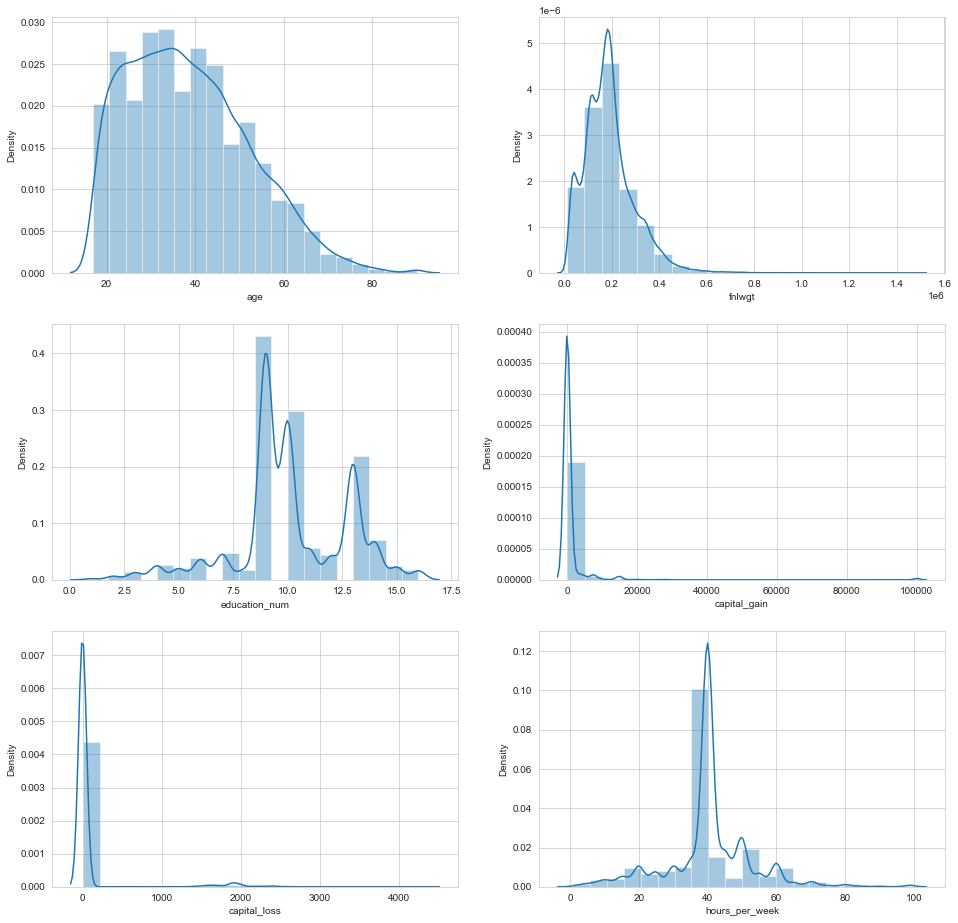

In [25]:
fig, ax = plt.subplots(3,2, figsize=(16,16))
sns.distplot(data1.age, bins = 20, ax=ax[0,0]) 
sns.distplot(data1.fnlwgt, bins = 20, ax=ax[0,1]) 
sns.distplot(data1.education_num, bins = 20, ax=ax[1,0]) 
sns.distplot(data1.capital_gain, bins = 20, ax=ax[1,1]) 
sns.distplot(data1.capital_loss, bins = 20, ax=ax[2,0])
sns.distplot(data1.hours_per_week, bins = 20, ax=ax[2,1])

- Most of the individuals have an age < 50 while the maximum age is around 90.
- In general, people do not have investments other than their regular income. However, there are very few people who invest, and there are also a small number of outliers who earn more than 90000 via capital gains. However, among the people who had a, capital loss the average loss looks to be around 2000.
- On average, most of the people have studied till education number 9 or 10 in the areas where the census was taken.
- Most of the people work around 40 hrs per week. However there are a few who don’t work and a few who work for almost 100 hours a week.

In [26]:
sns.set(rc={'figure.figsize':(10,8)})

<AxesSubplot:xlabel='income', ylabel='count'>

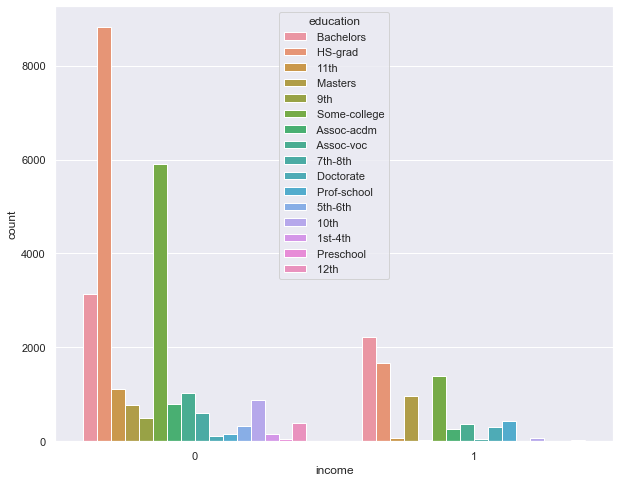

In [27]:
#Plot of education corresponding to income

sns.countplot(x = 'income', hue = 'education', data = data1)

- For the people who have completed their education up till 12th Standard, there are just a handful of them who earn more than 50K dollars an year. Most of the people end up earning below 50K!
- For the people belonging to Bachelors, Masters, Doctorate, Prof-school category in the education level, there are more number of people who are earning greater than 50K dollars an year than the number of people earning less than it.
- In case of Assoc-acad or Assoc-voc, there are a few people who earn more than 50K dollars an year.
- There are many HS-grads who earn less than 50K.

<AxesSubplot:xlabel='income', ylabel='count'>

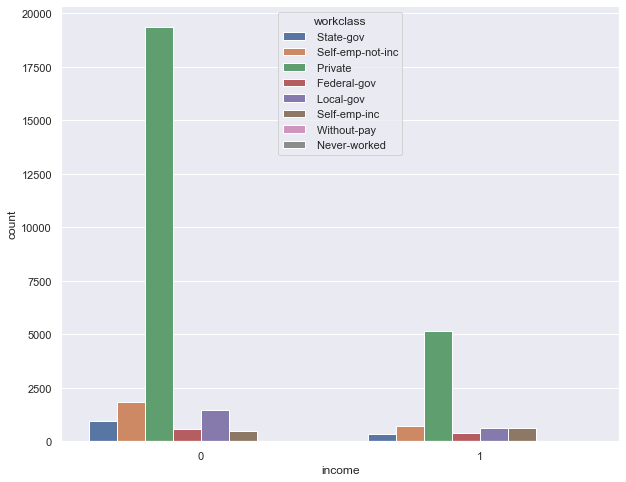

In [28]:
#Plotting workclass corresponding to the income

sns.countplot(x = 'income', hue = 'workclass', data = data1)

- It is quite interesting to see that Self-Employed is the only category where the number of people who earn more than 50K dollars exceed those earning less than it! It might be conducive to suggest that when you handle your own business, start-up, etc. you are more likely to earn better if it gets successful!
- People working in the Private Sector face a significant difference between their pays where more than 75% of them earn less than 50K dollars an year!
- There is a very minute difference between the number of people whose income is more or less than 50K dollars an year who work for the Federal Govt.
- People belonging to the category Without-Pay and Never-Worked hardly contain any data in both the categories.
- From here we see that most of the people having salary less than 50k is from the private sector.

<AxesSubplot:xlabel='income', ylabel='count'>

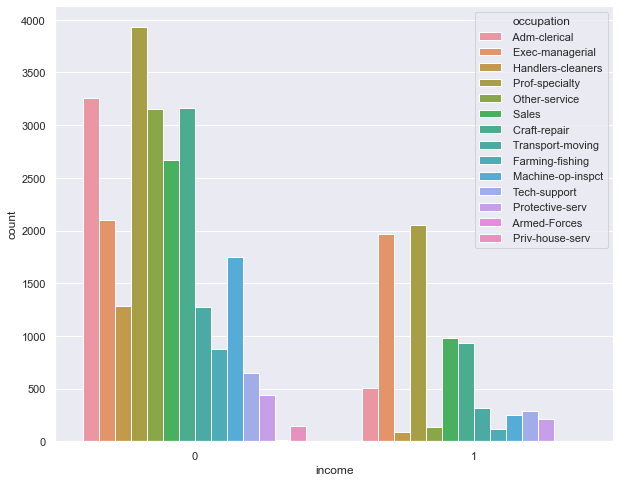

In [29]:
#Plot of occupation corresponding to the income

sns.countplot(x = 'income', hue = 'occupation', data = data1)

- Adults in Exec-managerial role are equally likely to earn more than 50K dollars an year.
- There's a slightly high probablity for an adult in Prof-specialty to earn more than 50K dollars an year.
- Adults working in Farming-fishing, Machine-op-inspect, Other-service, Adm-clerical, Transport-moving are very less likely to earn more than 50K dollars an year.
- Around 25% of the people working in Sales earn more than 50K dollars an year.

<AxesSubplot:xlabel='education'>

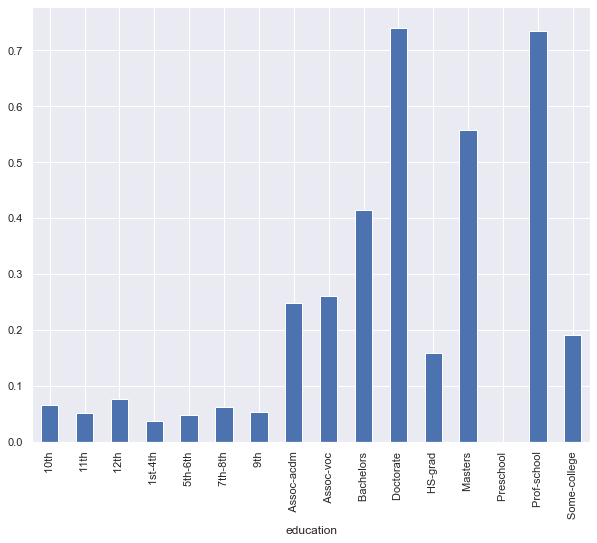

In [44]:
#plotting a bar graph for Education against Income to see the relation between these columns 
data1.groupby('education').income.mean().plot(kind='bar')

Adults with an educational background of Prof-school and Doctorate will have a better income and it is likely possible that their income is higher than 50K.

<AxesSubplot:xlabel='income', ylabel='count'>

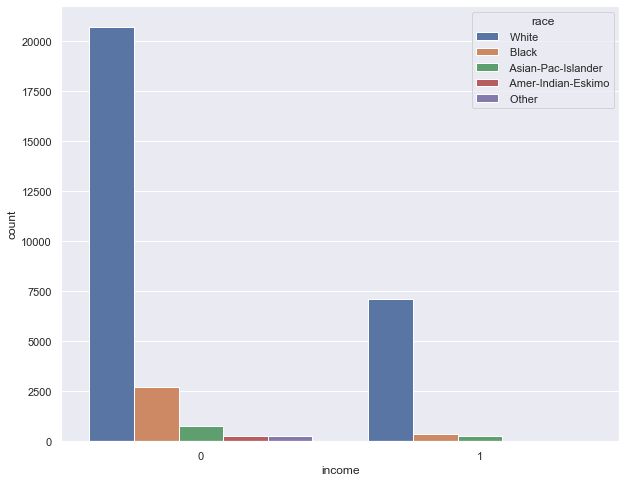

In [30]:
sns.countplot(x = 'income', hue = 'race', data = data1)

An important point to notice over here is that, except Whites there are very few people of different races. Due to this one may fail to notice the exact percentage and relationship of people earning more than 50K dollars an year.

<AxesSubplot:xlabel='income', ylabel='count'>

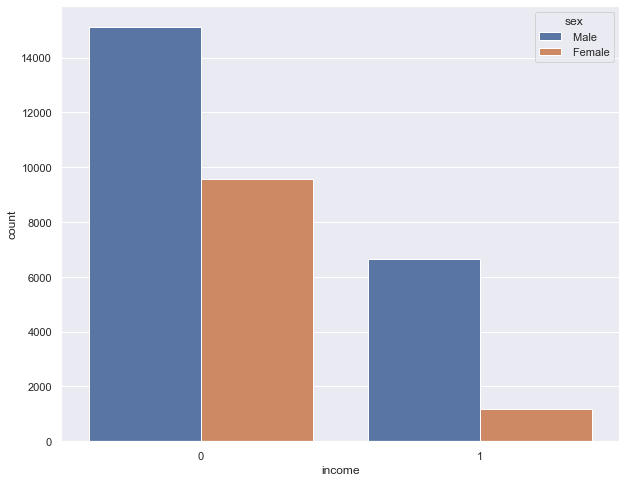

In [31]:
#Plot of sex corresponding to income

sns.countplot(x = 'income', hue = 'sex', data = data1)

We see that most of the people working are having salary less than 50k.

We can see a significant gap in the earnings between males and females over here.

For Females, there are less than 10% of the adults earning more than 50K dollars an year.
In case of Males there are close to 33% of them earning more than 50K dollars an year.

<AxesSubplot:xlabel='sex'>

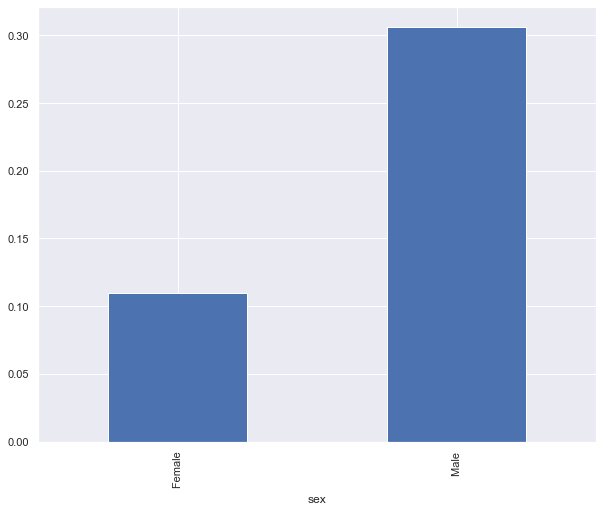

In [46]:
data1.groupby('sex').income.mean().plot(kind='bar')

The gender bar chart provides us some useful insight into the data that Men are more likely to have a higher income.

<AxesSubplot:xlabel='count', ylabel='marital_status'>

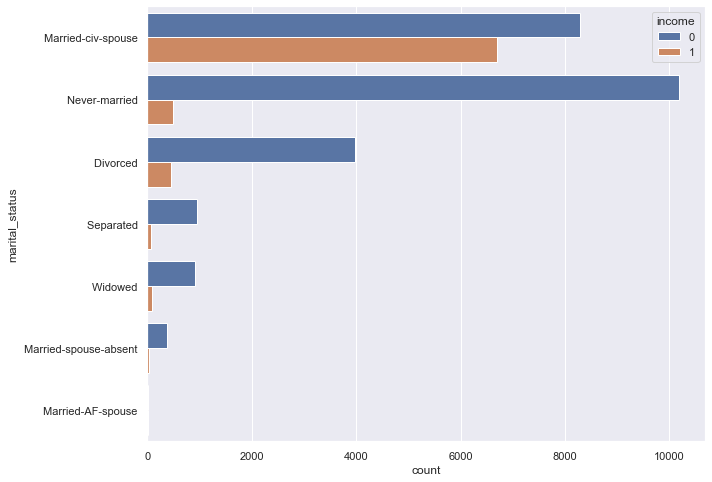

In [47]:
sns.countplot(y=data1['marital_status'], hue=data1['income'], order = data1['marital_status'].value_counts().index)

- We see that most of the married people are earning more than 50k as compared to other classes
- One thing to note here is that Married-civ-spouse is the only category which has comparable number of people belonging to both categories.
- For others, there are less than 25% of the adults earning more than 50K dollars an year.

### Setting feature vector and target variable

As we see that the values of attributes in the dataset vary largely, so it is important to scale the data.

In [33]:
X = data1.drop(['income'], axis=1)

y = data1['income']

### Split data into separate training and test set

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### Encoding categorical variables

In [35]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [36]:
X_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
13011,36,3,316298,9,13,4,12,3,4,1,0,0,40,38
24494,30,3,101283,15,10,4,7,1,4,0,0,0,40,38
16923,41,3,143003,8,11,2,7,0,1,1,7298,0,60,18
25335,46,4,216414,12,14,2,11,0,4,1,0,1977,60,38
12363,37,1,249392,8,11,2,10,0,4,1,0,0,40,38


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

### Logistic Regression

Logistic Regression is one of the easiest and most commonly used supervised Machine learning algorithms for categorical classification. The basic fundamental concepts of Logistic Regression are easy to understand and can be used as a baseline algorithm for any binary (0 or 1) classification problem.

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0)
#Train our model with the training data
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [39]:
#print our price predictions on our test data
y_pred = log_reg.predict(X_test)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6936  409]
 [1311 1106]]


0.8238065970088096

In [41]:
accuracy_log_reg = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)}")

The accuracy of the model is 0.824
